# Mini-Course on 
# Machine Learning Methods in Finance @ KAUST
## From Signatures to Reinforcement Learning
Christian Bayer, Christoph Belak, Blanka Horvath, **Paul Hager$\ast$**

$\ast$ Humboldt University of Berlin



23. May 2022

___

## Outline of the Lecture
This lecture will be a practical guide to:


1. **calculating the truncated log-signatures** for piecewise linear paths,


2. implementing **deep signature stopping rules**,


3. approximating the **optimal stopping** problem of **fractional Brownian motion** 

___

## 1. Calculation of Log-Signatures

*Notation:* $\{\color{blue}{e_1}, \dots, \color{blue}{e_d}\}$ will denote a basis of $\mathbb{R}^d$.

### 1.1 Recap of Signatures of Smooth Paths

Recall that the **signature** of a smooth path $x: [0,T] \to \mathbb{R}^d$ is given by the sequence of **iterated integerals as a** formal **tensor series**

$$ \mathbb{x}^{<\infty}_{s,t} = 1 + \int_s^t dx_{t_1} + \int_s^t \int_s^{t_2} dx_{t_1} \otimes dx_{t_2} + \dots \quad \in \mathbb{T}((\mathbb{R}^d)),\quad (0 \le s \le t \le T).$$

In other words, the **component** of the signature corresponding to the multiindex or **word**  $\color{blue}{i_1} \cdots \color{blue}{i_n} \in \{\color{blue}{1}, ..., \color{blue}{d}\}^n$ is given by

$$\langle \color{blue}{i_1} \cdots \color{blue}{i_n}, \mathbb{x}^{<\infty}_{s,t}\rangle = \idotsint_{s \le t_1 \le \dots \le t_n \le t} dx^{\color{blue}{i_1}}_{t_1}  \dots dx^{\color{blue}{i_n}}_{t_n} $$
___

Furthermore, we have also seen that the signature satisfies the **Chen relation**

$$ \mathbb{x}^{<\infty}_{s,t} = \mathbb{x}^{<\infty}_{s,u} \otimes \mathbb{x}^{<\infty}_{u,t},\qquad (0 \le s \le u \le t \le T)$$

and the **shuffle identity**

$$ \langle w, \mathbb{x}^{<\infty}_{s,t}\rangle \langle v, \mathbb{x}^{<\infty}_{s,t}\rangle = \langle w   \sqcup\mathchoice{\mkern-7mu}{\mkern-7mu}{\mkern-3.2mu}{\mkern-3.8mu}\sqcup  v, \mathbb{x}_{s,t}\rangle, \qquad w, v \in \mathcal{W}_d.$$
_____

The elements of of the tensor algebra satisfying the shuffle relation form a group - the **free Lie group** $G(\mathbb{R}^d)$ its tensor-logarithm $\mathfrak{g}(\mathbb{R}^d) = \log(G(\mathbb{R}^d))$ is the
___

### 1.2 The Free Lie algebra

The free Lie algebra can be characterized in another way.

Define the bilinear **commutator bracket**

$$[\cdot, \cdot]: T((\mathbb{R}^d)) \times T((\mathbb{R}^d)) \to T((\mathbb{R}^d)), \qquad [a, b] = a\otimes b - b \otimes a.$$

and note that it satisfies the following relations:

- (antisymmetry) $\quad[a,b] = -[b,q]$
- (Jacobi identity) $\quad [a,[b,c]] + [b, [c, a]] + [c, [a, b]] = 0$
___

The free Lie algebra $\mathfrak{g}(\mathbb{R}^d)$ is the **smallest sub-algebra** of $T((\mathbb{R}^d))$ **containing** $\mathbb{R}^d$ that is **closed under** the the commutator bracket $[\cdot, \cdot]$.

In other words, it is the algebra generated by $\{\color{blue}{e_1}, \cdots \color{blue}{e_d}\}$ and $[\cdot, \cdot]$.
___

*What does that mean for the signature?*

There exists as sequence of *bracketing expressions* such that

$$\mathbb{x}^{<\infty}_{0,t} = \exp( a_1 \color{blue}{e_1} + \dots + a_d \color{blue}{e_d} + a_{12}[\color{blue}{e_1}, \color{blue}{e_2}] + \dots a_{(d-1)d}[\color{blue}{e_{d-1}}, \color{blue}{e_d}] \\+ a_{(d-1)d}[\color{blue}{e_1},[\color{blue}{e_1}, \color{blue}{e_2}]] + \dots).$$
___

This raises two further questions:

- What basis can we choose on $\mathfrak{g}(\mathbb{R}^d)$?


- How to calculated the coefficients of the log-signature in that basis?
___

### 1.3 A Basis of the Free Lie Algebra

For simplicity let us assume that $d=2$ (the one-dimensional case yields no insight) and identify $\color{blue}{e_i} \leftrightarrow \color{blue}{i}$.

Let us look at the first bracketing terms:
___

1. On the **1st level** we have **no brackets**
    - $\color{blue}{1}$, $\color{blue}{2}$.
___

2. On the **2nd level** we obtain 
    - $[\color{blue}{1}, \color{blue}{1}]$, $[\color{blue}{1}, \color{blue}{2}]$, $[\color{blue}{2}, \color{blue}{1}]$, $[\color{blue}{2}, \color{blue}{2}]$

    By definition we have $[\color{blue}{1}, \color{blue}{1}] = [\color{blue}{2}, \color{blue}{2}] = 0$ and $[\color{blue}{1}, \color{blue}{2}] = - [\color{blue}{2}, \color{blue}{1}]$.

    Hence we can single out **one basis element** $[\color{blue}{1}, \color{blue}{2}]$ for this level.
___

3. On the **3nd level** we obtain 

    - $[\color{blue}{1}, [\color{blue}{1}, \color{blue}{2}]],\quad$  $[\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]],$

    where we have already dismissed the difference between left- and right bracketing.
    No further simplifications are possible.
___

4. On the **4th level** we obtain 
    - $[\color{blue}{1}, [\color{blue}{1}, [\color{blue}{1}, \color{blue}{2}]],\quad$ $[\color{blue}{1}, [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]]$
    - $[\color{blue}{2}, [\color{blue}{1}, [\color{blue}{1}, \color{blue}{2}]],\quad$ $[\color{blue}{2}, [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]]$
    - $[[\color{blue}{1}, \color{blue}{2}], [\color{blue}{1}, \color{blue}{2}]]$
    
    The last term is clearly zero, however we have by the Jacobi identity we have $$0 = [[\color{blue}{1}, \color{blue}{2}], [\color{blue}{1}, \color{blue}{2}]] =  - [\color{blue}{1}, [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]]] - [\color{blue}{2}, [[\color{blue}{1}, \color{blue}{2}], \color{blue}{1}]] \\
    \qquad\qquad\qquad\hspace{.4em} = - [\color{blue}{1}, [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]]] + [\color{blue}{2}, [\color{blue}{1}, [\color{blue}{1}, \color{blue}{2}]]]$$
    hence we only need one of the two terms of the above r.h.s.
___

Hence using the properties of the Lie bracket we arrived at the following basis for $\mathfrak{g}^{4}(\mathbb{R}^2)$

$$\color{blue}{1},\; \color{blue}{2},
\\ [\color{blue}{1}, \color{blue}{2}],\\
[\color{blue}{1}, [\color{blue}{1}, \color{blue}{2}]],\; [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]],\\
[\color{blue}{1}, [\color{blue}{1}, [\color{blue}{1}, \color{blue}{2}]],\; [\color{blue}{1}, [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]],\; [\color{blue}{2}, [\color{blue}{2}, [\color{blue}{1}, \color{blue}{2}]]$$

yielding $\dim(\mathfrak{g}^{4}(\mathbb{R}^2)) = 8$.
___

This already hints, why it is **much more efficient to save the log-signature** instead of the signature itself.

Indeed, the **level 4 truncated signature** has **dimension**

$$\dim(T^4(\mathbb{R}^2))-1 = 2 + 2^2 + 2^3 + 2^4 = 30.$$

___

*How can we systemize the above considerations?*

*One way* two construct a basis of the free Lie algebra is through so-called **Lyndon words**.

*Unfortunately a detailed description of Lyndon words would go beyond the scope of this lecture.*
___

However, we can look **again at the $d=2$ case more systematically**. 
The following are the **first Lyondon words up to the level 4**:

$$\color{blue}{1},\; \color{blue}{2},\; \color{blue}{1}\color{blue}{2},\; \color{blue}{1}\color{blue}{1}\color{blue}{2},\; \color{blue}{1}\color{blue}{2}\color{blue}{2},\; \color{blue}{1}\color{blue}{1} \color{blue}{1}\color{blue}{2},\; \color{blue}{1}\color{blue}{1}\color{blue}{2}\color{blue}{2},\; \color{blue}{1}\color{blue}{2}\color{blue}{2}\color{blue}{2}.$$

*Why?* Because each word is comes **before all its proper suffixes in lexicografical order**.
___

For $\color{blue}{1}$ and $\color{blue}{2}$ there are no proper suffixes.

- $\color{blue}{1}\color{blue}{2} < \color{blue}{2}$


- $\color{blue}{1}\color{blue}{1}\color{blue}{2} < \color{blue}{1}\color{blue}{2}, \; \color{blue}{2}$


- $\color{blue}{1}\color{blue}{2}\color{blue}{2} < \color{blue}{2}\color{blue}{2}, \; \color{blue}{2}$


- $\color{blue}{1}\color{blue}{1} \color{blue}{1}\color{blue}{2}  < \color{blue}{1} \color{blue}{1}\color{blue}{2},\; \color{blue}{1}\color{blue}{2}, \; \color{blue}{2}$


- etc.


___

Every Lyndon **word** $w$ (longer then one) has at least one proper **suffix that is also a Lyndon word**. Denote by $Ly(w)$ the **longest** such suffix

- $Ly(\color{blue}{1}\color{blue}{2}) = \color{blue}{2}$


- $Ly(\color{blue}{1}\color{blue}{1}\color{blue}{2}) = \color{blue}{12}$


- $Ly(\color{blue}{1}\color{blue}{2}\color{blue}{2}) = \color{blue}{2}$


- $Ly(\color{blue}{1}\color{blue}{1} \color{blue}{1}\color{blue}{2}) = \color{blue}{1} \color{blue}{1}\color{blue}{2}$


- etc.
___

On can define a map $\sigma$ **from Lyndon words to the Lie algebra** by

- $\sigma(i) = i, \qquad i\in \{\color{blue}{1}, \dots, \color{blue}{d}\}$

- $\sigma(w) = [\;\sigma(v)\;,\; \sigma(Ly(w))\;], \qquad$ for $w = vLy(w).$

E.g. $\sigma(\color{blue}{1}\color{blue}{1}\color{blue}{2}\color{blue}{2}) = [\color{blue}{1}, \sigma(\color{blue}{1}\color{blue}{2}\color{blue}{2})] = [\color{blue}{1}, [\sigma(\color{blue}{1}\color{blue}{2}), \color{blue}{2}]] = [\color{blue}{1}, [[\color{blue}{1},\color{blue}{2}], \color{blue}{2}]]$.

One can show that **the image of $\sigma$ forms a basis of the free Lie algebra**.
___

In order to determine $\dim(\mathfrak{g}^{N}(\mathbb{R}^d))$ one can **count the number of Lyndon words up to level $N$**.
Algebraically this is related to counting necklaces and one obtains

$$\dim(\mathfrak{g}^{N}(\mathbb{R}^d)) := \sum_{n=1}^N \frac{1}{n} \sum_{k | n}\mu(n/k) d^k,$$

where the inner sum is taken over all divisors $k$ of $n$ and $\mu$ is the Möbius function.
___

Here is a comparison of the $\eta_{d, N} := \dim(\mathfrak{g}^{N}(\mathbb{R}^d))$ with the dimension of the signature $\sigma_{d,N} := \dim(T^{N}(\mathbb{R}^d))$

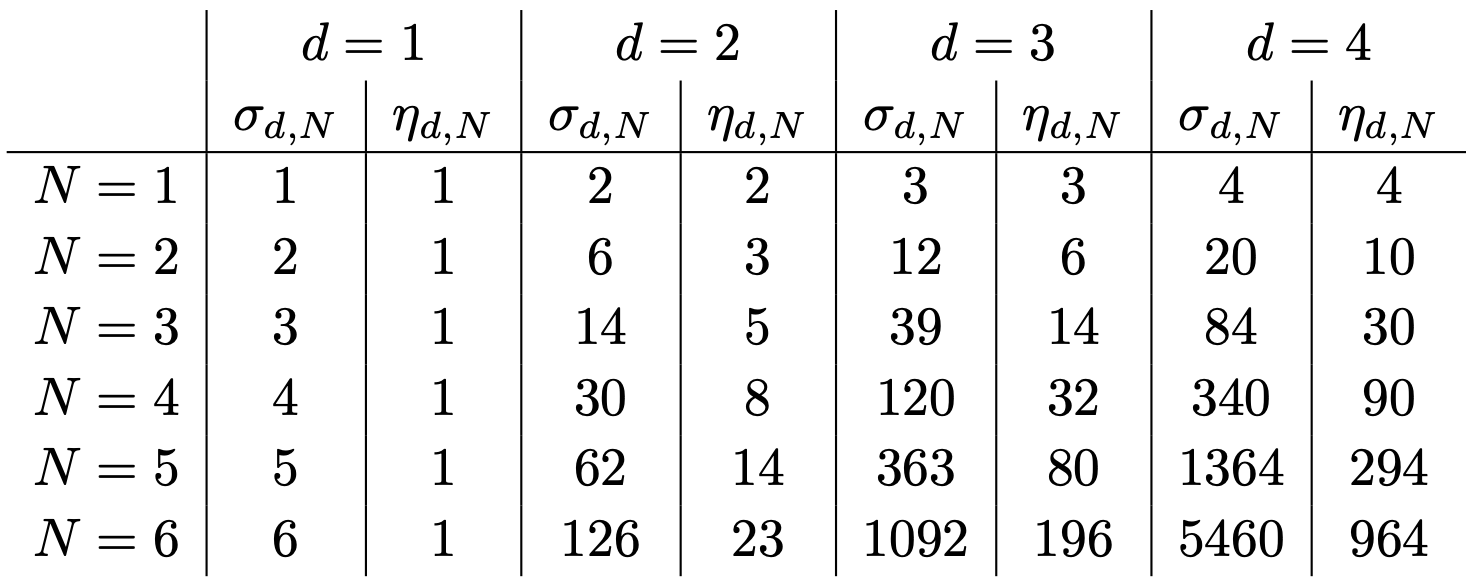

In [1]:
from IPython.display import Image
Image(filename='dimensions.png',width=600)

### 1.4 The Signature of Piecewise Linear Paths

Suppose that we are given a discrete time series $\{x_0, x_2, \dots, x_J\}\subset\mathbb{R}^d$. 
Denote by $x:[0,J]\to \mathbb{R}^d$ the **piecewise linear interpolation** and also define $\Delta x_j = x_j - x_{j-1}$.
___

First note that, due to linearity, in each interval interval $[j-1,j]$ we have

$$\idotsint_{n-1 \le t_1 \le \dots \le t_n \le n} dx_{t_1} \otimes  \dots \otimes dx_{t_n} = (\Delta x_j)^{\otimes n} \int_{\Delta_n} (dt)^n = \frac{1}{n!} (\Delta x_j)^{\otimes n}.$$

Hence the signature is given by

$$\mathbb{x}^{<\infty}_{j-1, j} = 1 + \sum_{n=1}^\infty \frac{1}{n!} (\Delta x_j)^{\otimes n} = \exp(\Delta x_j).$$
___

Then using Chen's identity, we have

$$\mathbb{x}^{<\infty}_{0, j} = \exp(\Delta x_1) \otimes \cdots \otimes \exp(\Delta x_j).$$

Hence in order to calculate the log-signature of a piecewise linear path we need to understand how to **multiply two non-commutative exponentials**.
___

#### **Theorem** (Baker-Campbell-Hausdorff + Dynkin formula)
> Let $\mathbf{a}, \mathbf{b} \in \mathfrak{g}(\mathbb{R}^d)$ then it holds
> 
> $$\log(\exp(\mathbf{a})\otimes\exp(\mathbf{b})) = \sum_{n=1}^{\infty} \sum_{k=1}^{n} \sum_{s_i + r_i > 0\\s_1+ \cdots+ r_k = n} \frac{(-1)^{n-1} [\mathbf{a}^{s_1} \mathbf{b}^{r_1} \cdots \mathbf{a}^{s_k} \mathbf{b}^{r_k}] }{k \cdot n \cdot s_1!r_1!\cdots s_k!r_k!}$$
> where $[\mathbf{a}^{r}\mathbf{c}] = [\mathbf{a}, [\mathbf{a}, \cdots (r \text{ times}) \cdots [\mathbf{a}, \mathbf{c}]\dots]]$.

- The formula gives an **explicit expression in terms of brackets**.


- However, it does **not express** the result **in terms of a Lie basis**.


- It is possible two **algorithmically calculated the BCH-formula directly in the Lyndon basis** (see Casas and Murua 2009). The description of this method is, *however, beyond the scope of this lecture*.

Up to the first **three levels** the **BCH-formula in a Lie basis** reads

$$\log(\exp(\mathbf{a})\otimes\exp(\mathbf{b})) = \mathbf{a} + \mathbf{b} +\frac{1}{2}[\mathbf{a}, \mathbf{b}] + \frac{1}{12}([\mathbf{a}, [\mathbf{a}, \mathbf{b}]] + [[\mathbf{b}, \mathbf{a}], \mathbf{b}]) \, + \dots$$
___

*Returning to the log-signature of piecewise linear paths...*

Again we consider the case $d=2$ for simplicity and we **truncate the log-signature at level 3**.

Let us define coefficients in terms of the Lie basis

$$\log\mathbb{x}^{\le 3}_{0,t} =: \ell^{\le3}_t =: \ell^1_t\color{blue}{1} + \ell^2_t(t)\color{blue}{2} + \ell^{12}_t[\color{blue}{1},\color{blue}{2}] + \ell^{112}_t[\color{blue}{1},[\color{blue}{1},\color{blue}{2}]] + \ell^{122}_t[[\color{blue}{1},\color{blue}{2}], \color{blue}{2}]$$
___

By previous considerations we can **calculate the log signature iteratively using the BCH-formula**. Indeed

$$ \ell^{\le3}_j  = \log(\exp(\ell^{\le3}_{j-1})\otimes \exp(\Delta x_j)) \hspace{19em}
\\= \ell^{\le3}_{j-1} + \Delta x_j + \frac{1}{2}[\ell^{\le3}_{j-1}, \Delta x_j] + \frac{1}{12}([\ell^{\le3}_{j-1}, [\ell^{\le3}_{j-1}, \Delta x_j]] + [[\Delta x_j, \ell^{\le3}_{j-1}], \Delta x_j]) \, + \dots \\
= \ell^{\le3}_{j-1} + \Delta x_j + \frac{1}{2}[\ell^{\le2}_{j-1}, \Delta x_j] + \frac{1}{12}([\ell^{\le1}_{j-1}, [\ell^{\le1}_{j-1}, \Delta x_j]] + [[\Delta x_j, \ell^{\le1}_{j-1}], \Delta x_j]) \, + \dots$$
___

Comparing coefficients we obtain

- $\ell^{1}_j = \ell^{1}_{j-1} + \Delta x_j^1$


- $\ell^{2}_j = \ell^{2}_{j-1} + \Delta x_j^2$


- $\ell^{12}_j = \ell^{12}_{j-1} + \frac{1}{2}(\ell^{1}_{j-1}\Delta x_j^2 - \ell^{2}_{j-1}\Delta x_j^1)$


- $\ell^{112}_j = \ell^{112}_{j-1} - \frac{1}{2} \ell^{12}_{j-1}\Delta x_j^1 $
    $ \qquad\quad + \frac{1}{12}(\ell^{1}_{j-1}\ell^{1}_{j-1}\Delta x_j^2 - \ell^{1}_{j-1}\ell^{2}_{j-1}\Delta x_j^1 - \Delta x_j^1\ell^{2}_{j-1}\Delta x_j^1 + \Delta x_j^2\ell^{1}_{j-1} \Delta x_j^1)$
    $\qquad = \ell^{112}_{j-1} - \frac{1}{2} \Delta x_j^1 \ell^{12}_{j-1}  + \frac{1}{12}(\ell^{1}_{j-1}-\Delta x_j^1)(\ell^{1}_{j-1}\Delta x_j^2 - \ell^{2}_{j-1}\Delta x_j^1)$
    

- $\ell^{122}_j = \ell^{122}_{j-1} + \frac{1}{2} \ell^{12}_{j-1}\Delta x_j^2 $
    $ \qquad\quad + \frac{1}{12}(-\ell^{2}_{j-1}\ell^{1}_{j-1}\Delta x_j^2 + \ell^{2}_{j-1}\ell^{2}_{j-1}\Delta x_j^1 + \Delta x_j^1\ell^{2}_{j-1}\Delta x_j^2 - \Delta x_j^2\ell^{1}_{j-1} \Delta x_j^2)$
    $\qquad = \ell^{112}_{j-1} - \frac{1}{2} \ell^{12}_{j-1}\Delta x_j^2  - \frac{1}{12}(\ell^{2}_{j-1}-\Delta x_j^2)(\ell^{1}_{j-1}\Delta x_j^2 - \ell^{2}_{j-1}\Delta x_j^1)$
    
Here is an implmentation of this computation:

In [3]:
import numpy as np

def full_log_signature_dim_two_level_three(X, deg):
    """
    :param X: Matrix of discrete sample paths.
    :param deg: Truncation level of the log-signature (>=1,<=3).
    :return: log-signature for each subinterval.
    """
    m, n, d = X.shape
    
    assert d == 2
    assert (deg>=1) and (deg<=3)
    
    log_sig_dim = {1: 2, 2: 3, 3: 5}
    
    log_sig = np.zeros((m, n, log_sig_dim[deg]))
    
    log_sig[:,1:,:2] = X[:, 1:] - X[:, 0].reshape(-1, 1, 2)
        
    if deg >=2:
        dX = np.diff(X, axis=1)
        
        for i in range(1, n):
            l = log_sig[:, i - 1]
            dx = dX[:, i - 1]
            log_sig[:, i, 2] = l[:, 2] + 0.5 * (l[:, 0] * dx[:, 1] - l[:, 1] * dx[:, 0])
            
    if deg == 3:
        for i in range(1, n):
            l = log_sig[:, i - 1]
            dx = dX[:, i - 1]
            log_sig[:, i, 3] = l[:, 3] - 0.5 * l[:, 2] * dx[:, 0] + (1 / 12) * \
                    (l[:, 0] - dx[:, 0]) * (l[:, 0] * dx[:, 1] - l[:, 1] * dx[:, 0])
            log_sig[:, i, 4] = l[:, 4] + 0.5 * l[:, 2] * dx[:, 1] - (1 / 12) * \
                    (l[:, 1] - dx[:, 1]) * (l[:, 0] * dx[:, 1] - l[:, 1] * dx[:, 0])
            
    return log_sig

*Let us do a sanity check*:

In [4]:
X = np.array([
    [[0,0], [1,1], [2,2], [3,3]]
])

log_sig = full_log_signature_dim_two_level_three(X, 3)


def print_log_sig_dim_two_degree_three(log_sig_):
    print(8*" ", "".join(["{0:^11s}".format(s) 
                          for s in ["1", "2", "12", "112", "122"]]))
    for j, l in enumerate(log_sig_[0]):
        print('j = {}:'.format(j), 
              " ".join(format(e_, "10.3f") for e_ in l))
        
print_log_sig_dim_two_degree_three(log_sig)

              1          2         12         112        122    
j = 0:      0.000      0.000      0.000      0.000      0.000
j = 1:      1.000      1.000      0.000      0.000      0.000
j = 2:      2.000      2.000      0.000      0.000      0.000
j = 3:      3.000      3.000      0.000      0.000      0.000


In [5]:
X = np.array([
    [[0,0], [1,1], [2,0], [3,-1], [4,0]]
])

log_sig = full_log_signature_dim_two_level_three(X, 3)

print_log_sig_dim_two_degree_three(log_sig)

              1          2         12         112        122    
j = 0:      0.000      0.000      0.000      0.000      0.000
j = 1:      1.000      1.000      0.000      0.000      0.000
j = 2:      2.000      0.000     -1.000      0.000      0.333
j = 3:      3.000     -1.000     -2.000      0.333      1.000
j = 4:      4.000      0.000      0.000      2.000      0.667


For **the general case**, i.e., higher dimension and truncation level one can **pre-calculate the BCH-formula in Lyndon basis**. This is done by the `iisignature` package. Let us wrap our function from above:

In [14]:
import iisignature as ii

def full_log_signature(X, deg):
    """
    :param X: Matrix of discrete sample paths.
    :param deg: Truncation level of the log-signature.
    :return: log-signature for each subinterval.
    """
    m, n, d = X.shape
    
    log_sig = np.zeros((m, n, ii.logsiglength(d, deg)))
    
    if (d==2) and (deg<=3):
        return full_log_signature_dim_two_level_three(X, deg)
    else:
        bch = ii.prepare(d, deg, 'C') #precalculate the BCH formula
        for i in range(1, n):
            log_sig[:, i] = ii.logsig(X[:,:i+1], bch, 'C')
    
    return log_sig

## 2. Implementing Deep Signature Stopping Rules

Recall that we have considered **randomized** stopping rules of the form

$$\tau_\theta = \inf\left\{ t \in [0,T] \;\bigg\vert\; \int_0^t \theta(\mathbb{X}\vert_{[0,s]})^2 ds \;\ge\; Z\right\},$$

where 

- $\hat{\mathbb{X}}$ is an underlying (time augmented) rough path generating the filtration,

- $\theta$ a continuous map from the path space to $\mathbb{R}$,

- $Z$ is a positive random variable independent of everything else.

___

We have studied the case where $\theta(\mathbb{X}\vert_{[0,t]}) = \langle \ell, \mathbb{X}_{0,t} \rangle$ a linear functional of the signature.

In the following we will, however, **focus on the case where $\theta$ is a deep neural network**.
___

More specifically we define a deep **signature stopping rule** by

$$\theta(\mathbb{X}\vert_{[0,t]}) = (A_I \circ \varphi \circ A_{I-1} \circ \varphi \cdots \circ A_0)(\log \mathbb{X}^{\le N}_{0,t}),$$

where

- $A_0: \mathbb{R}^{\eta_{N,d}} \to \mathbb{R}^{q}$,
- $A_1, \dots, A_{I-1}: \mathbb{R}^{q} \to \mathbb{R}^{q}$,
- and $A_I: \mathbb{R}^{q} \to \mathbb{R}$ are **affine maps**,
- $q\in\mathbb{N}$ is the number of **neurons** and $I\in\mathbb{N}$ is the **depth** of the network,
- and $N\in\mathbb{N}$ is the log-signature **truncation level**.
___

Denote by $\mathcal{T}_{\log}$ the **space of deep signature stopping rules** and recall that we had also the following approximation result
#### **Theorem** (Bayer-H-Riedel-Schoenmakers)
> Let Y be adapted to the filtration generated by $\mathbb{X}$ with $\mathbb{E}[\Vert Y \Vert_\infty] < \infty$ then it holds
>
> $$\sup_{\tau \in \mathcal{S}}\mathbb{E}[Y_\tau] \;=\; \sup_{\theta \in \mathcal{T}_{\log}}\mathbb{E}[Y_{\tau_\theta}],$$
>
> where $\mathcal{S}$ is the set of all stopping times.
___

One of the important steps in the proof was that due to randomization the expected stopped value is of the form

$$\mathbb{E}[Y_{\tau_\theta}] = Y_0 + \mathbb{E}\left[ \int_0^T \exp\left(-\int_0^t \theta(\mathbb{X}\vert_{[0,s]})^2 ds \right)dY_t\right],$$

for the case that we have chosen $Z\sim\mathrm{Exp}(1)$.
___

This expression immediately suggest a **numerical approach to optimization**

1. **Sample** $\mathbb{X}$ and $Y$ on a **time-grid** $\{t_0, \cdots, t_n\}$ say $m$ times. 


2. **Calculate the log-signature** for discretized sample path of $\hat{\mathbb{X}}$ for some truncation level $N$.


3. In the above expression, **replace integrals and expectations by discrete sums and optimze over $\theta \in \mathcal{T}_{\log}$** using backpropagation and stochastic gradient decent. 


4. **Resimulate** $\mathbb{X}$, $Y$ and $\log(\hat{\mathbb{X}}^{\le N})$ and use the result of the optimization $\theta^{\ast} \in \mathcal{T}_{\log}$ to **calculate a lower bound**.

___

*One **remark** before we start with the implementation:*

Note that the **number of parameters** of the neural network depends on $q, I, N$ and $d$. 

It **does not depend on $n$**, the of the discretization grid!

This is in strong contrast to approaches where the lifting the path to a $n$-dimensional Markov process

$$(X_{t_0}, 0, \dots, 0),\; (X_{t_1}, X_{t_0}, 0, \dots, 0),\; (X_{t_2}, X_{t_1}, X_{t_0}, 0, \dots, 0),\; \dots \in \mathbb{R}^{n\times d}.$$
___

In [18]:
import tensorflow as tf
from functools import reduce

class DensNeuralNetwork:
    
    def __init__(self, n_nodes, n_layers):
        self.layers = [
            tf.keras.layers.Dense(n_nodes, activation='relu') 
                       for i in range(n_layers)]
        self.final_layer = tf.keras.layers.Dense(1, activation=None)
        self.flatten = tf.keras.layers.Flatten()

    def __call__(self, x):
        y = reduce(lambda x_, f: f(x_), [x] + self.layers)
        return self.flatten(self.final_layer(y))

class IntegratedStoppingRule(tf.keras.layers.Layer):

    def __init__(self):
        super(IntegratedStoppingRule, self).__init__()
        self.steps = None

    def build(self, input_shape):
        self.steps = input_shape[-1]

    def call(self, rule, **kwargs):
        return tf.cumsum(rule**2, axis=1) / (self.steps - 1)
    
class RandomizedStoppingLoss(tf.keras.layers.Layer):
    
    def __init__(self):
        super(RandomizedStoppingLoss, self).__init__()

    def call(self, inputs, **kwargs):
        rule, Y = inputs
        
        out = tf.exp(-rule)
        
        dY = Y[:, 1:] - Y[:, :-1]
        
        out = Y[:, 0] + tf.reduce_sum(out[:, :-1] * dY, axis=1)
        
        self.add_loss(-out)
        
        return out

## 3. Optimal Stopping of Fractional Brownian Motion

Finally, we turn to a specific example. 

Let $X^H$ be a fractional Brownian motion (fBm) with Hurst parameter $H\in(0,1]$.

Note that the time augmented path $\hat{X} = ((t, X^H_t))_{0 \le t \le T}$ is a rough path. (Indeed, no *lift* is needed since all iterated (cross) integrals are pathwise well-defined as Young integrals.)

We are interested in the optimal stopping of the fBm, hence $Y=X^{H}$, i.e., in approximating

$$\sup_{\tau\in\mathcal{S}}\mathbb{E}[X^H_\tau]$$
___

First we will need to **generate sample paths** of fBm.

As explained on the exercise sheet, this **can efficiently be done using the circulant embedding method** and the fast Fourier transform.

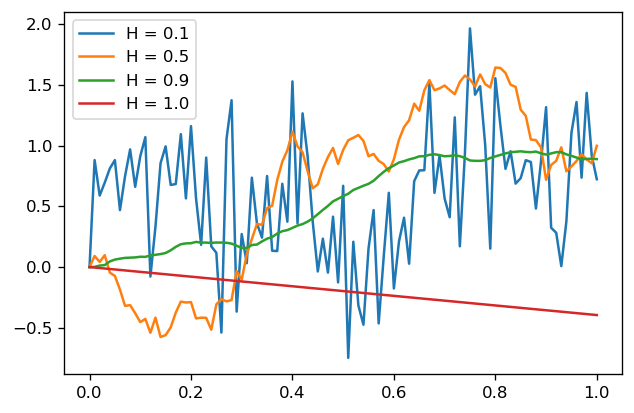

In [11]:
import scipy
from scipy.fft import hfft, ihfft

def stationary_gaussian(m, mean, c):
    gam = np.concatenate([c, c[1:-1][::-1]])
    lam = np.sqrt(scipy.fft.rfft(gam))
    return hfft(lam * ihfft( np.random.randn(m, len(gam)) ))[:,:n]

def simulate_fBm(m, H, delta, n):
    cov = lambda k: 0.5*(np.abs(k+1)**(2*H) + np.abs(k-1)**(2*H))\
                        - np.abs(k)**(2*H)
    X = np.zeros((m,n+1))
    X[:, 1:] = stationary_gaussian(m, 0, cov(np.arange(n)))
    return delta**H * np.cumsum(X, axis=1, out=X)

from matplotlib import pyplot as plt

n = 100
delta = 1.0/n
T = np.linspace(0, 1, n+1)

plt.figure(dpi=120)
for H in [0.1, 0.5, 0.9, 1.0]:
    X = simulate_fBm(2, H, delta, n)
    plt.plot(T, X[0], label="H = {}".format(H))
plt.legend();

#### ... collecting all the code

In [12]:
def build_network(n, deg, I, q):
    
    d = ii.logsiglength(2, deg)
    
    input_logsig = tf.keras.Input(shape=(n, d), name='sig')
    
    input_y = tf.keras.Input(shape=(n,), name='Y')

    rule_layer = IntegratedStoppingRule()(DensNeuralNetwork(d + q, I)(input_logsig))
    
    loss_layer = RandomizedStoppingLoss()([rule_layer, input_y]) 
    
    model = tf.keras.Model([input_logsig, input_y], loss_layer)
    
    rule_model = tf.keras.Model(input_logsig, rule_layer)
    
    return model, rule_model


def log_sig_fbm(m, H, T, n, deg):
    
    X = np.zeros((m, n + 1, 2))
    
    X[:, :, 0] = np.linspace(0, T, n + 1)
    
    X[:, :, 1] = simulate_fBm(m, H, T/(n+1), n)
    
    return full_log_signature(X, deg)

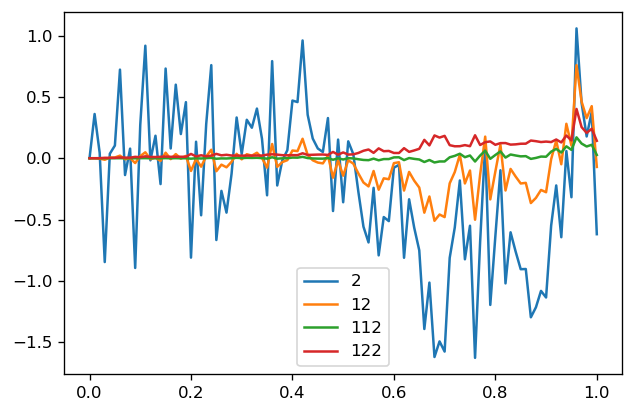

In [15]:
log_signature = log_sig_fbm(m=1, H=0.1, T=1.0, n=100, deg=3)

plt.figure(dpi=120)
plt.plot(log_signature[0,:,0], log_signature[0,:,1], label="2")
plt.plot(log_signature[0,:,0], log_signature[0,:,2], label="12")
plt.plot(log_signature[0,:,0], log_signature[0,:,3], label="112")
plt.plot(log_signature[0,:,0], log_signature[0,:,4], label="122")
plt.legend();

#### Generating the data and training the network

In [23]:
import tensorflow as tf

m = 100_000
T = 1
n = 100
deg = 3
H = 0.9

model, rule_model = build_network(n + 1, deg, I = 2, q = 30)

log_sig = log_sig_fbm(m, H, T, n, deg)
Y = log_sig[:,:,1]

log_sig_val = log_sig_fbm(m, H, T, n, deg)
Y_val = log_sig_val[:,:,1]

optimizer = tf.keras.optimizers.Adagrad(learning_rate=.1)
model.compile(optimizer)

model.fit([log_sig, Y], batch_size=100, epochs=10, verbose=1, 
validation_data=([log_sig_val, Y_val]));

Epoch 1/10
1000/1000 [==============================] - 8s 7ms/step - loss: -0.2959 - val_loss: -0.3206
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: -0.3220 - val_loss: -0.3255
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: -0.3245 - val_loss: -0.3261
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: -0.3259 - val_loss: -0.3270
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: -0.3223 - val_loss: -0.3274
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: -0.3243 - val_loss: -0.3265
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: -0.3244 - val_loss: -0.3278
Epoch 8/10
1000/1000 [==============================] - 6s 6ms/step - loss: -0.3273 - val_loss: -0.3283
Epoch 9/10
1000/1000 [==============================] - 5s 5ms/step - loss: -0.3274 - val_loss: -0.3284
Epoch 10/10
1000/1000 [==============================] - 5s 5ms/

#### Calculating Lower Bounds

In [21]:
log_sig = log_sig_fbm(100_000, H, T, n, deg)
Y = log_sig[:,:,1]
res = model.predict([log_sig, Y])
res.mean(), res.var()/np.sqrt(100_000)

(1.0304726, 0.0021025969237349557)

#### Visualisation of the trained signature stopping rule

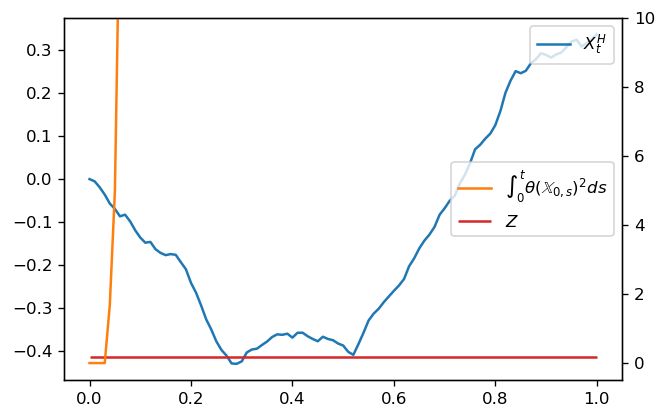

In [25]:
i = np.random.randint(m)
rule = rule_model.predict(log_sig[i:i+1]).flatten()

plt.figure(dpi=120)
plt.plot(log_sig[0, :, 0], log_sig[i, :, 1], label=r'$X_t^H$')
plt.legend(loc=1);
plt.twinx()
plt.hlines(np.random.exponential(1.0), 0, T, color='C3', label="$Z$")
plt.plot(log_sig[0, :, 0], rule.flatten(), 
         c='C1', label=r'$\int_0^t\theta(\mathbb{X}_{0,s})^2ds$')
plt.ylim(-0.5,10)
plt.legend(loc=5);

#### Results for different Hurst parameters

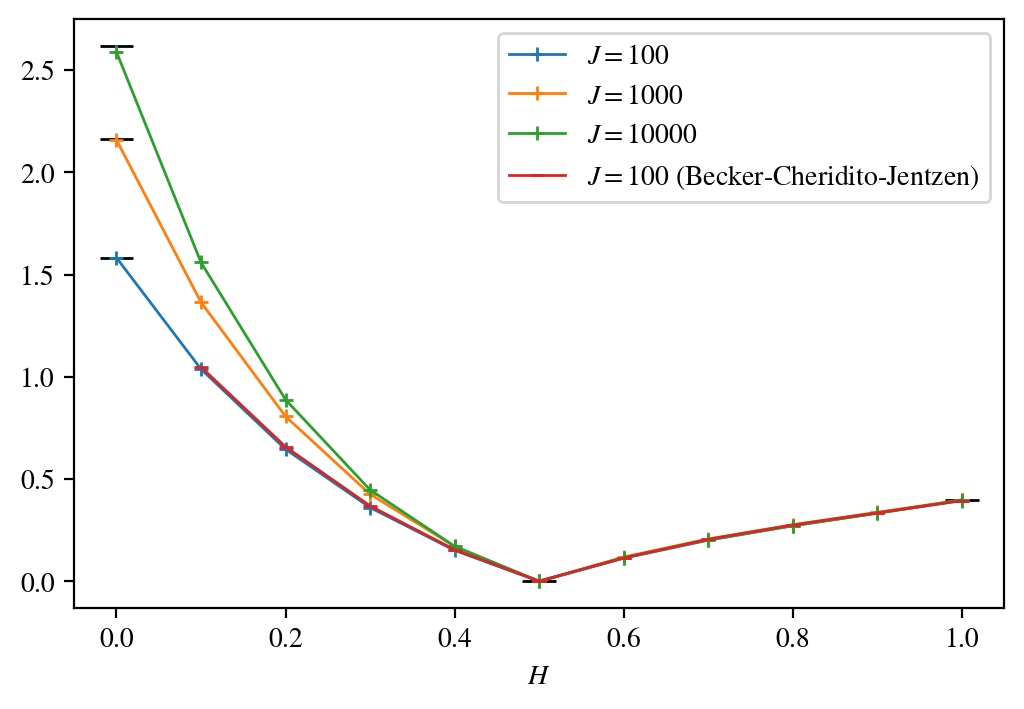

In [26]:
from IPython.display import Image
Image(filename='different_H_plot.png',width=600)

## References

**Signature stopping paper**
- C. Bayer, P. Hager, S. Riedel, J. Schoenmakers, *Optimal stopping with signatures*, 03 May 2021, [arxiv](http://arxiv.org/abs/2105.00778) (to appear in the *Annals of Applied Probability*)

**Algorithmic calculation of BCH-formula**
- F. Casas, A. Murua, *An efficient algorithm for computing the Baker-Campbell- Hausdorff series and some of its applications”, In: Journal of Mathematical Physics 50.3 (Mar. 2009), p. 033513. [arxiv](http://arxiv.org/abs/0810.2656).

**Details on the Lyndon Basis**
- P. Lalonde and A. Ram, *Standard Lyndon Bases of Lie Algebras and Enveloping Algebras*, Transactions of the American Mathematical Society 347.5 (1995), pp. 1821–1830.

**A short note on log-signature calculation**
- J. Reizenstein, *Calculation of Iterated-Integral Signatures and Log Signatures*, 7 Dec 2017, [arxiv](https://arxiv.org/abs/1712.02757)

**A good chapter on the free Lie-algebra in the context of rough paths in**
- P. K. Friz and N.B. Victoir, *Multidimensional stochastic processes as rough paths*, volume 120 of Cambridge Studies in Advanced Mathematics. Cambridge University Press, Cambridge, 2010. Theory and applications.

I will upload this notebook to my website: *hagerpa.github.io*

# Thank You!